In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons
from PIL import Image
import requests
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

In [6]:
print("=" * 80)
print("SECTION 1: WHEN K-MEANS FAILS - NON-SPHERICAL CLUSTERS")
print("=" * 80)

X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
X_moons

SECTION 1: WHEN K-MEANS FAILS - NON-SPHERICAL CLUSTERS


array([[ 6.82988224e-01, -3.45203344e-01],
       [ 2.04099043e+00, -1.31614674e-01],
       [-1.39751545e-01,  4.54390502e-01],
       [ 8.85747852e-01,  2.86341827e-01],
       [ 1.18245853e+00, -4.97710508e-01],
       [ 1.01920826e+00, -4.25465834e-01],
       [ 3.89361586e-01, -2.47117226e-01],
       [-5.60384576e-01,  7.12681100e-01],
       [ 9.01843523e-01,  5.39308727e-02],
       [ 2.06747907e-01,  6.20769309e-03],
       [ 1.32352331e+00, -2.89175832e-01],
       [ 3.83758712e-01,  8.51802379e-01],
       [ 9.69121626e-01, -4.85487343e-01],
       [ 6.69900924e-01,  9.19338590e-01],
       [ 1.23207593e-01,  1.35338991e-02],
       [ 1.01678336e+00, -5.57668763e-01],
       [ 2.00829930e+00,  3.16434346e-01],
       [ 7.21580319e-01, -3.72571143e-01],
       [-8.56042097e-01,  2.18135896e-02],
       [ 1.82685277e-01,  2.87798699e-01],
       [-5.04992232e-02,  1.01489642e+00],
       [-8.40751844e-01,  5.38150274e-01],
       [ 1.51040341e+00, -4.55110964e-01],
       [ 1.

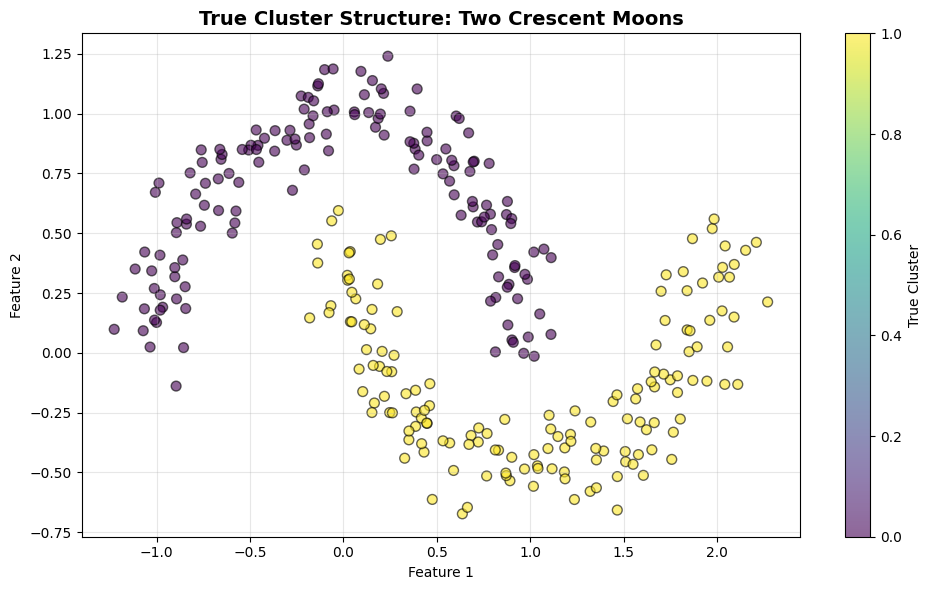

Dataset shape: (300, 2)
Number of true clusters: 2


In [ ]:


# Visualize the true structure
plt.figure(figsize=(10, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', 
            s=50, alpha=0.6, edgecolors='k')
plt.title('True Cluster Structure: Two Crescent Moons', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Dataset shape: {X_moons.shape}")
print(f"Number of true clusters: {len(np.unique(y_moons))}")

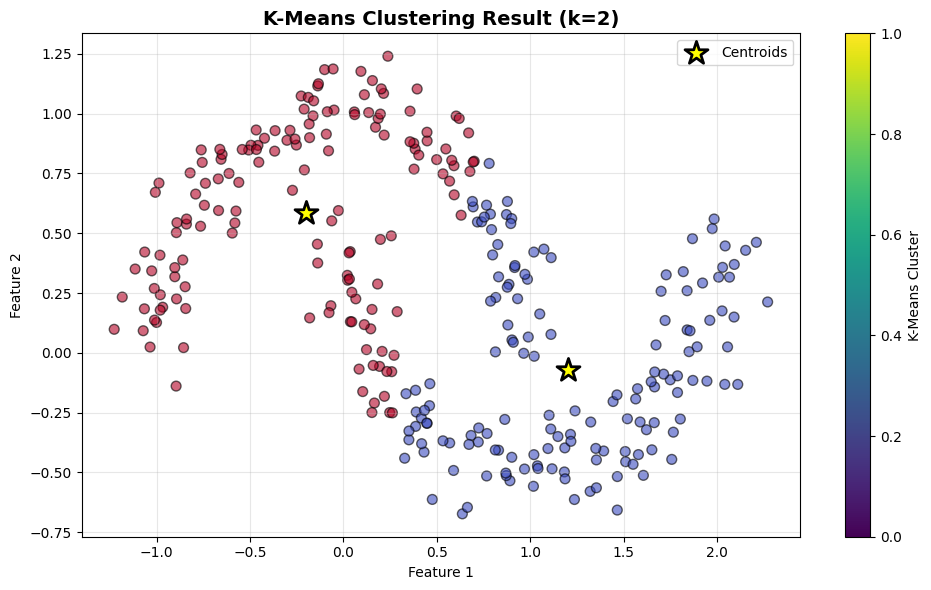

In [7]:
# Apply K-Means with k=2 (we know there are 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_moons)

# Visualize K-Means results
plt.figure(figsize=(10, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans, cmap='coolwarm', 
            s=50, alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='yellow', s=300, marker='*', edgecolors='black', linewidths=2,
            label='Centroids')
plt.title('K-Means Clustering Result (k=2)', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='K-Means Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

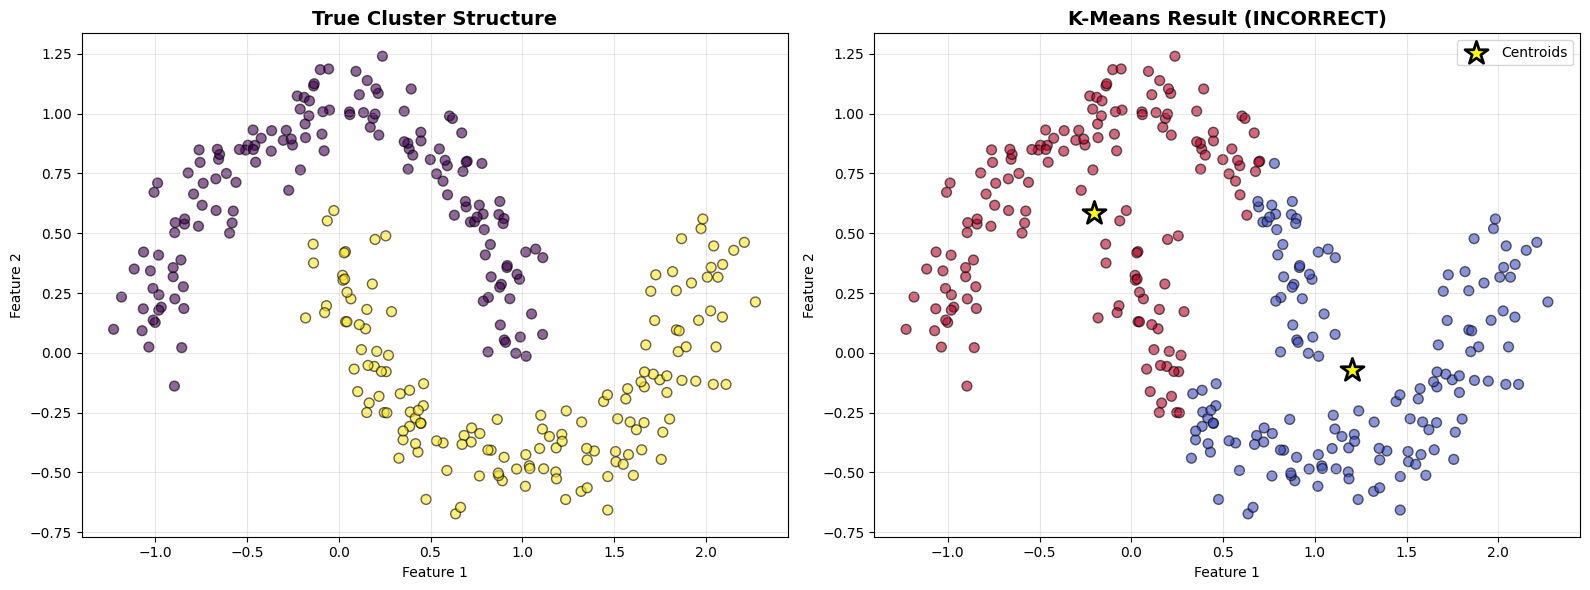

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# True clusters
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', 
                s=50, alpha=0.6, edgecolors='k')
axes[0].set_title('True Cluster Structure', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# K-Means clusters
axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans, cmap='coolwarm', 
                s=50, alpha=0.6, edgecolors='k')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                c='yellow', s=300, marker='*', edgecolors='black', linewidths=2,
                label='Centroids')
axes[1].set_title('K-Means Result (INCORRECT)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

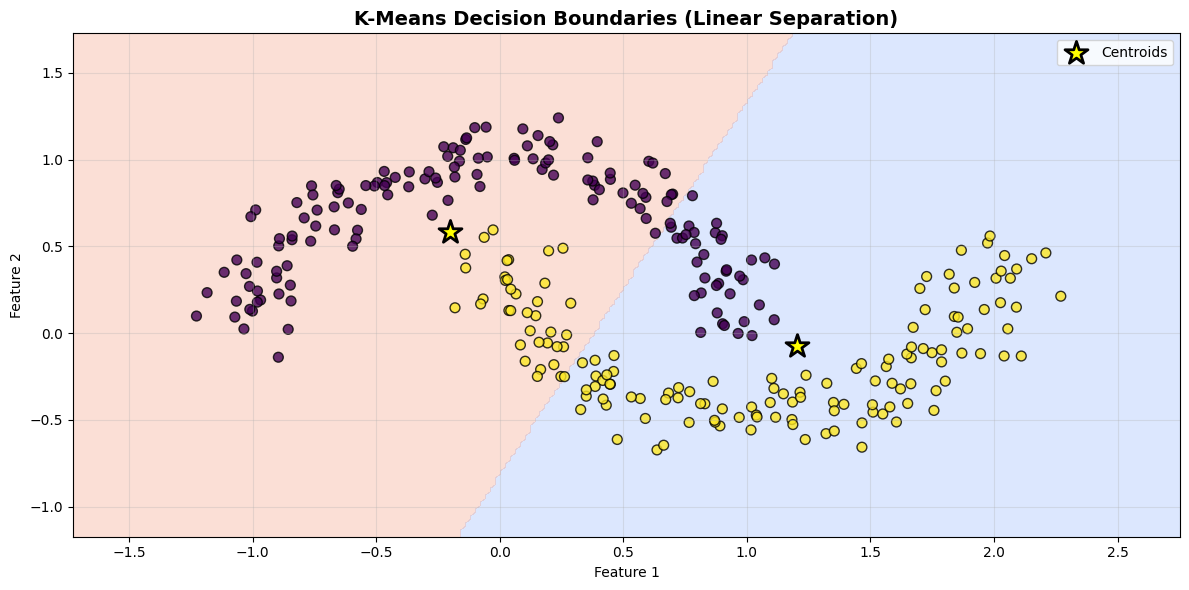


⚠️ OBSERVATION: K-Means draws a LINEAR boundary between clusters!
The algorithm cannot capture the curved, non-spherical structure of the moons.


In [9]:
# Create a mesh to plot decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict cluster for each point in the mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', 
            s=50, alpha=0.8, edgecolors='k', linewidths=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='yellow', s=300, marker='*', edgecolors='black', linewidths=2,
            label='Centroids')
plt.title('K-Means Decision Boundaries (Linear Separation)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n⚠️ OBSERVATION: K-Means draws a LINEAR boundary between clusters!")
print("The algorithm cannot capture the curved, non-spherical structure of the moons.")

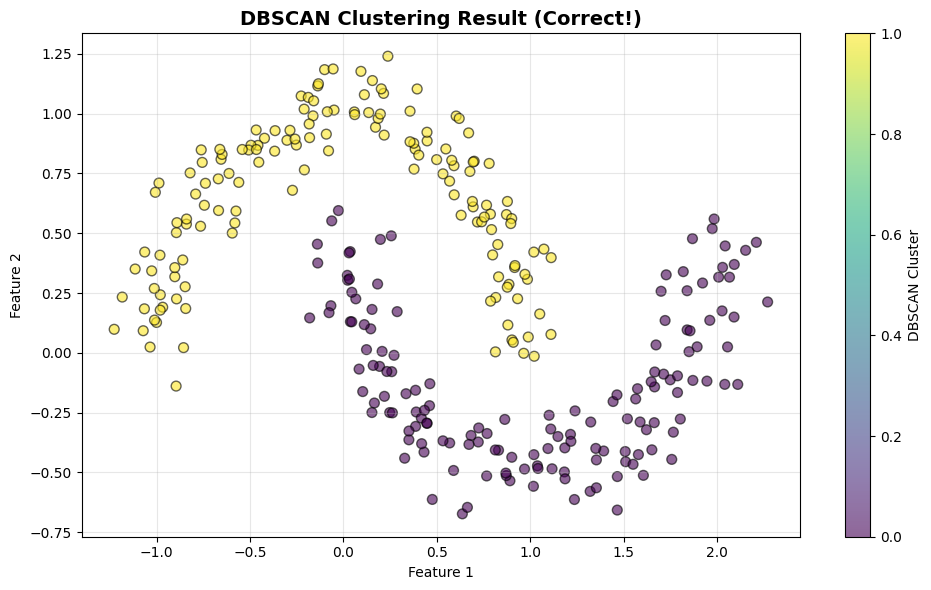

Number of clusters found: 2
Number of noise points: 0


In [10]:
# Apply DBSCAN (density-based clustering)
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons)

plt.figure(figsize=(10, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan, cmap='viridis', 
            s=50, alpha=0.6, edgecolors='k')
plt.title('DBSCAN Clustering Result (Correct!)', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='DBSCAN Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate metrics (check if we have at least 2 clusters)
n_clusters_dbscan = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)

print(f"Number of clusters found: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")

if n_clusters_dbscan >= 2:
    # Filter out noise points for silhouette calculation
    mask = y_dbscan != -1
else:
    print("DBSCAN found less than 2 clusters - metrics not applicable")

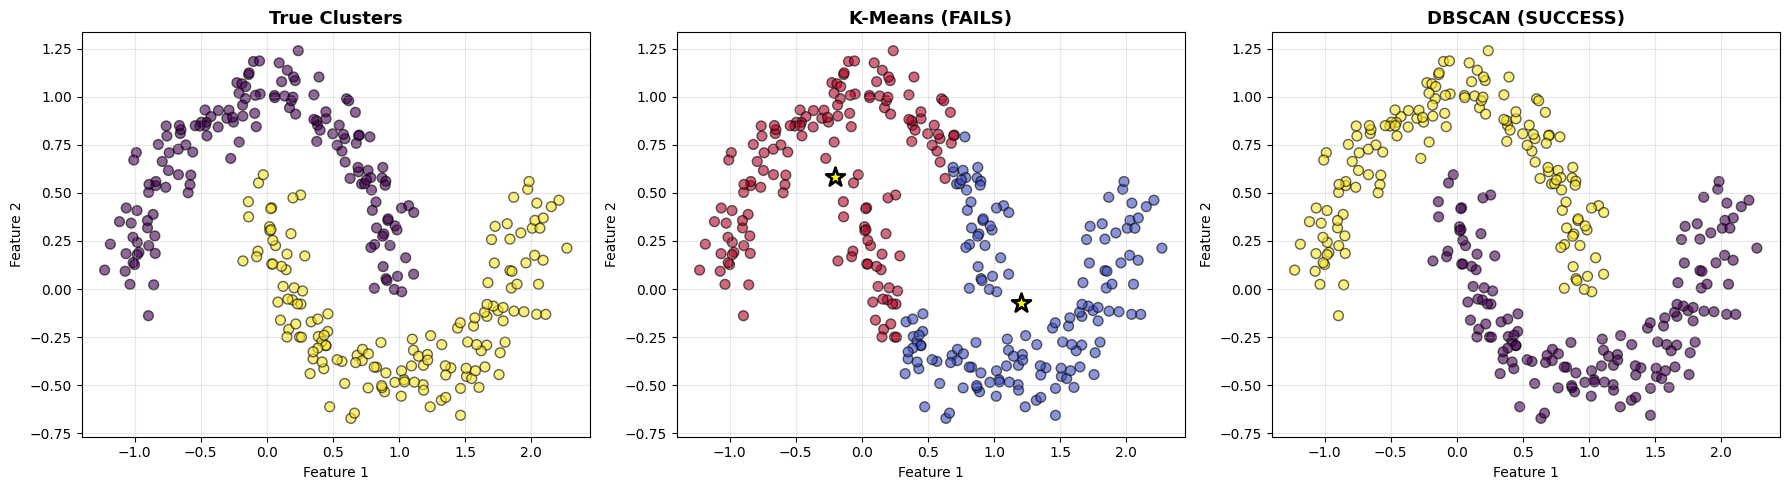

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# True clusters
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', 
                s=50, alpha=0.6, edgecolors='k')
axes[0].set_title('True Clusters', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# K-Means
axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans, cmap='coolwarm', 
                s=50, alpha=0.6, edgecolors='k')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                c='yellow', s=200, marker='*', edgecolors='black', linewidths=2)
axes[1].set_title('K-Means (FAILS)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

# DBSCAN
axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan, cmap='viridis', 
                s=50, alpha=0.6, edgecolors='k')
axes[2].set_title('DBSCAN (SUCCESS)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
print("\n" + "=" * 80)
print("SECTION 2: K-MEANS AS PREPROCESSING - IMAGE COMPRESSION")
print("=" * 80)
print("Problem: Reduce image file size while preserving visual quality")
print("K-Means Role: Cluster pixel colors into k dominant colors (Color Quantization)")
print("=" * 80)


SECTION 2: K-MEANS AS PREPROCESSING - IMAGE COMPRESSION
Problem: Reduce image file size while preserving visual quality
K-Means Role: Cluster pixel colors into k dominant colors (Color Quantization)


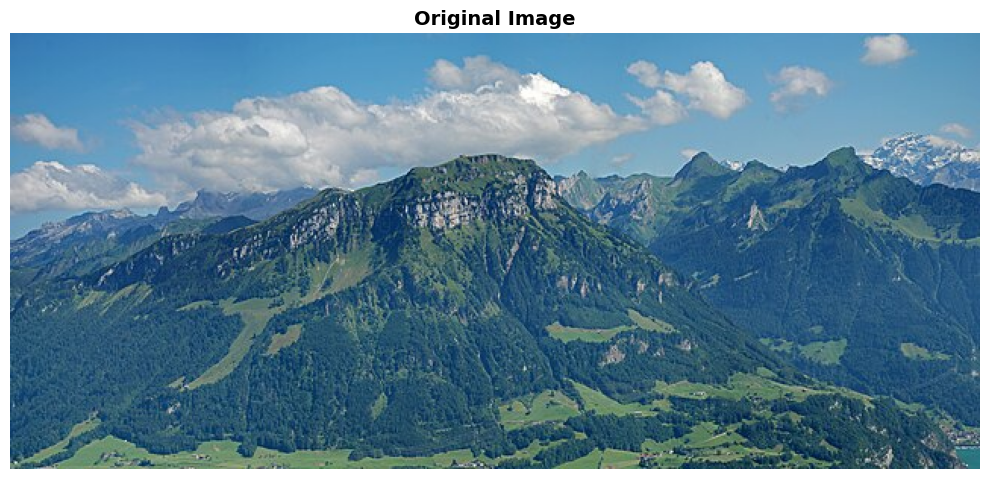

Image shape: (288, 640, 3)
Total pixels: 184,320
Color depth: 3 channels (RGB)
Unique colors in original: 48,656


In [ ]:
img = Image.open('./image1.jpg').convert('RGB') # Put in the path to your image
img_array = np.array(img)

plt.figure(figsize=(10, 6))
plt.imshow(img_array)
plt.title('Original Image', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Image shape: {img_array.shape}")
print(f"Total pixels: {img_array.shape[0] * img_array.shape[1]:,}")
print(f"Color depth: {img_array.shape[2]} channels (RGB)")
print(f"Unique colors in original: {len(np.unique(img_array.reshape(-1, 3), axis=0)):,}")

In [76]:
pixels = img_array.reshape(-1, 3)
print(f"\nReshaped data: {pixels.shape}")
print(f"Each row represents one pixel's RGB values")
print(f"\nSample pixels:\n{pixels[:5]}")


Reshaped data: (184320, 3)
Each row represents one pixel's RGB values

Sample pixels:
[[ 50 116 174]
 [ 50 116 174]
 [ 51 117 175]
 [ 51 117 175]
 [ 52 118 176]]


In [77]:
k_values = [2, 4, 8, 16, 32, 64]
compressed_images = {}
inertias = {}

print("\nCompressing image with different k values...")
for k in k_values:
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    
    # Replace each pixel with its cluster center (dominant color)
    compressed_pixels = kmeans.cluster_centers_[labels]
    
    # Reshape back to image shape
    compressed_img = compressed_pixels.reshape(img_array.shape).astype(np.uint8)
    compressed_images[k] = compressed_img
    inertias[k] = kmeans.inertia_
    
    print(f"k={k:2d}: Compressed to {k} colors (Inertia: {kmeans.inertia_:,.0f})")


Compressing image with different k values...
k= 2: Compressed to 2 colors (Inertia: 324,090,286)
k= 4: Compressed to 4 colors (Inertia: 142,678,908)
k= 8: Compressed to 8 colors (Inertia: 63,470,229)
k=16: Compressed to 16 colors (Inertia: 32,497,413)
k=32: Compressed to 32 colors (Inertia: 17,129,990)
k=64: Compressed to 64 colors (Inertia: 9,814,718)


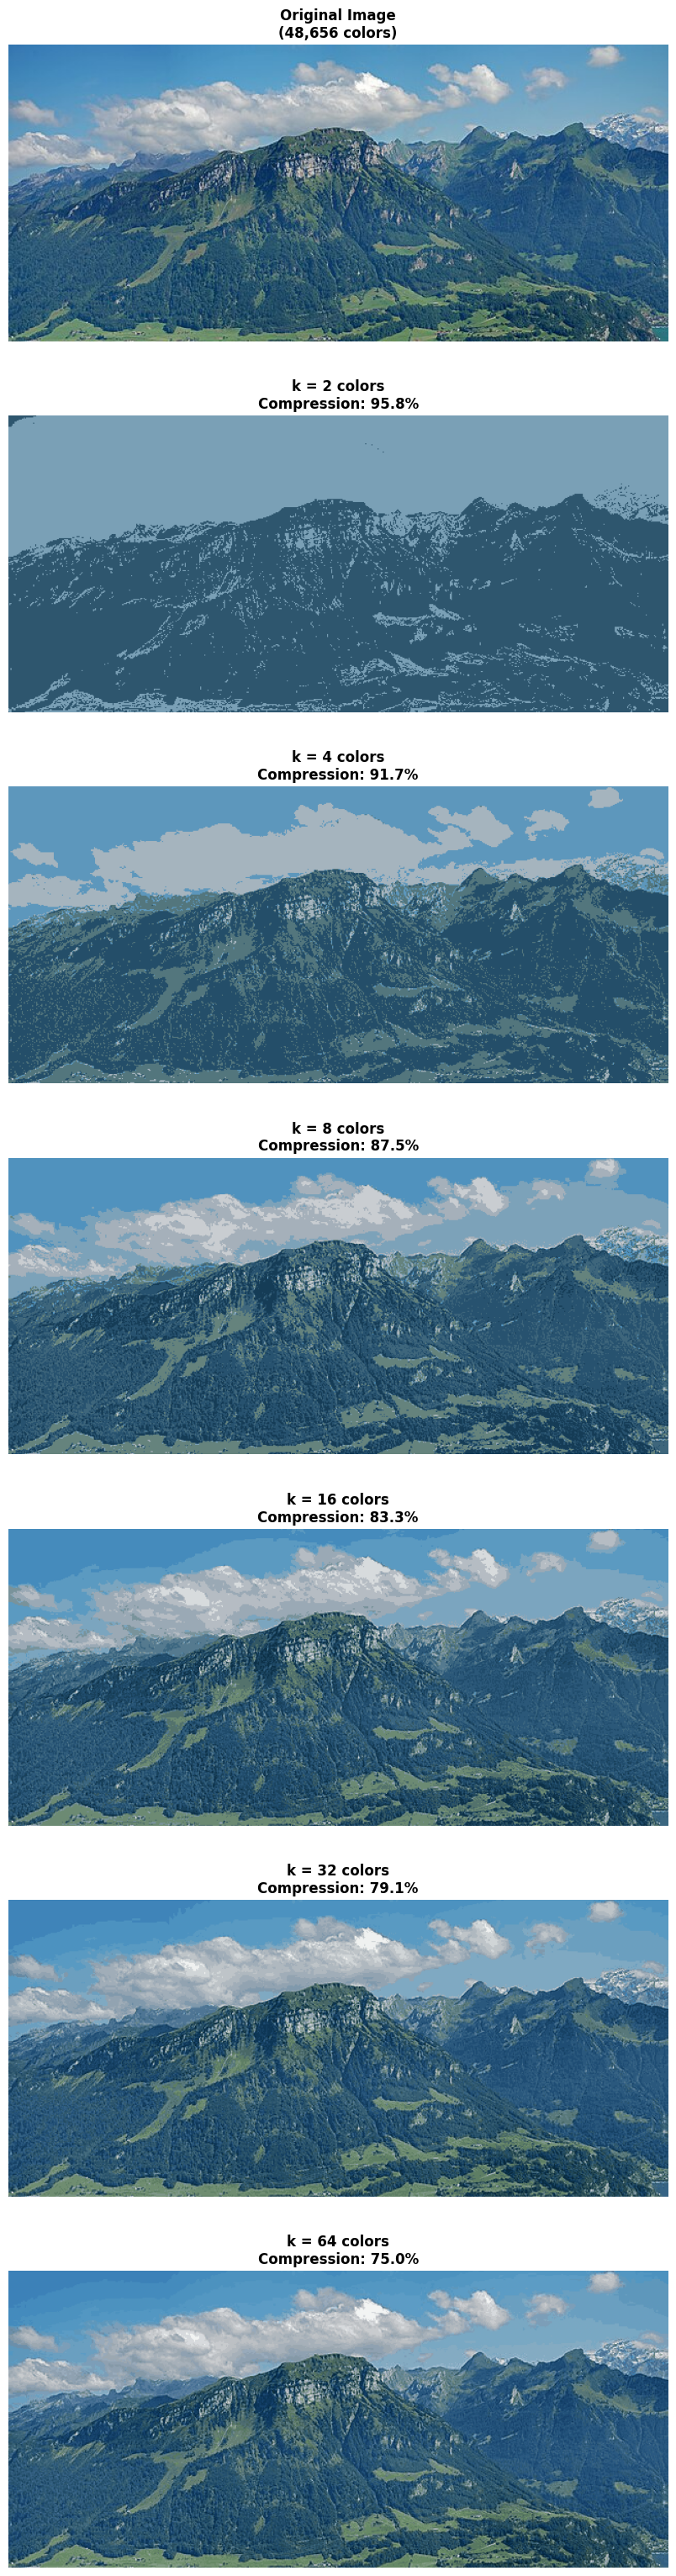

In [78]:
fig, axes = plt.subplots(7, 1, figsize=(20, 30))
axes = axes.ravel()

# Calculate original image size in bytes
original_size = img_array.nbytes

# Original image
axes[0].imshow(img_array)
axes[0].set_title(
    f'Original Image\n({len(np.unique(pixels, axis=0)):,} colors)',
    fontsize=12, fontweight='bold'
)
axes[0].axis('off')

for idx, k in enumerate(k_values, start=1):
    # Calculate compressed size
    palette_size = k * 3  # bytes
    index_size = (
        img_array.shape[0] * img_array.shape[1] * np.ceil(np.log2(k)) / 8
    )  # bytes
    compressed_size = palette_size + index_size
    compression_ratio = (1 - compressed_size / original_size) * 100

    axes[idx].imshow(compressed_images[k])
    axes[idx].set_title(
        f'k = {k} colors\nCompression: {compression_ratio:.1f}%',
        fontsize=12, fontweight='bold'
    )
    axes[idx].axis('off')

# Hide any unused axes
if len(axes) > len(k_values) + 1:
    for ax in axes[len(k_values) + 1:]:
        ax.axis('off')

for ax in axes:
    ax.set_aspect('equal', adjustable='box')

plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0.25)
plt.show()

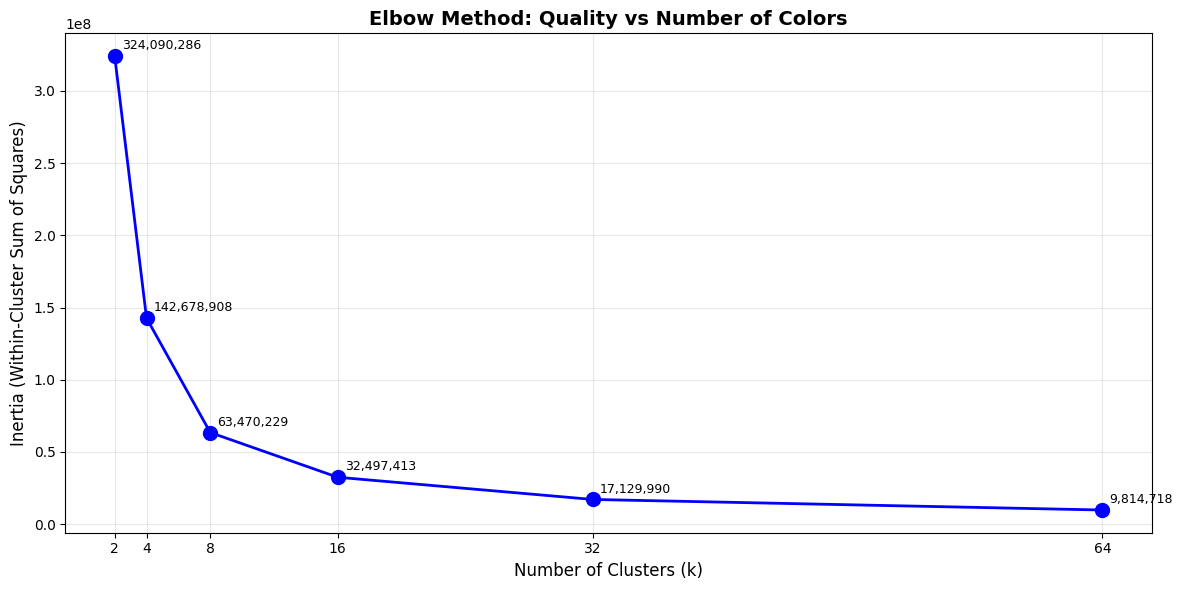


📊 The 'elbow' in the curve suggests the optimal trade-off between
   quality (low inertia) and compression (fewer colors)


In [79]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, [inertias[k] for k in k_values], 'bo-', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method: Quality vs Number of Colors', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Annotate each point
for k in k_values:
    plt.annotate(f'{inertias[k]:,.0f}', 
                xy=(k, inertias[k]), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 The 'elbow' in the curve suggests the optimal trade-off between")
print("   quality (low inertia) and compression (fewer colors)")

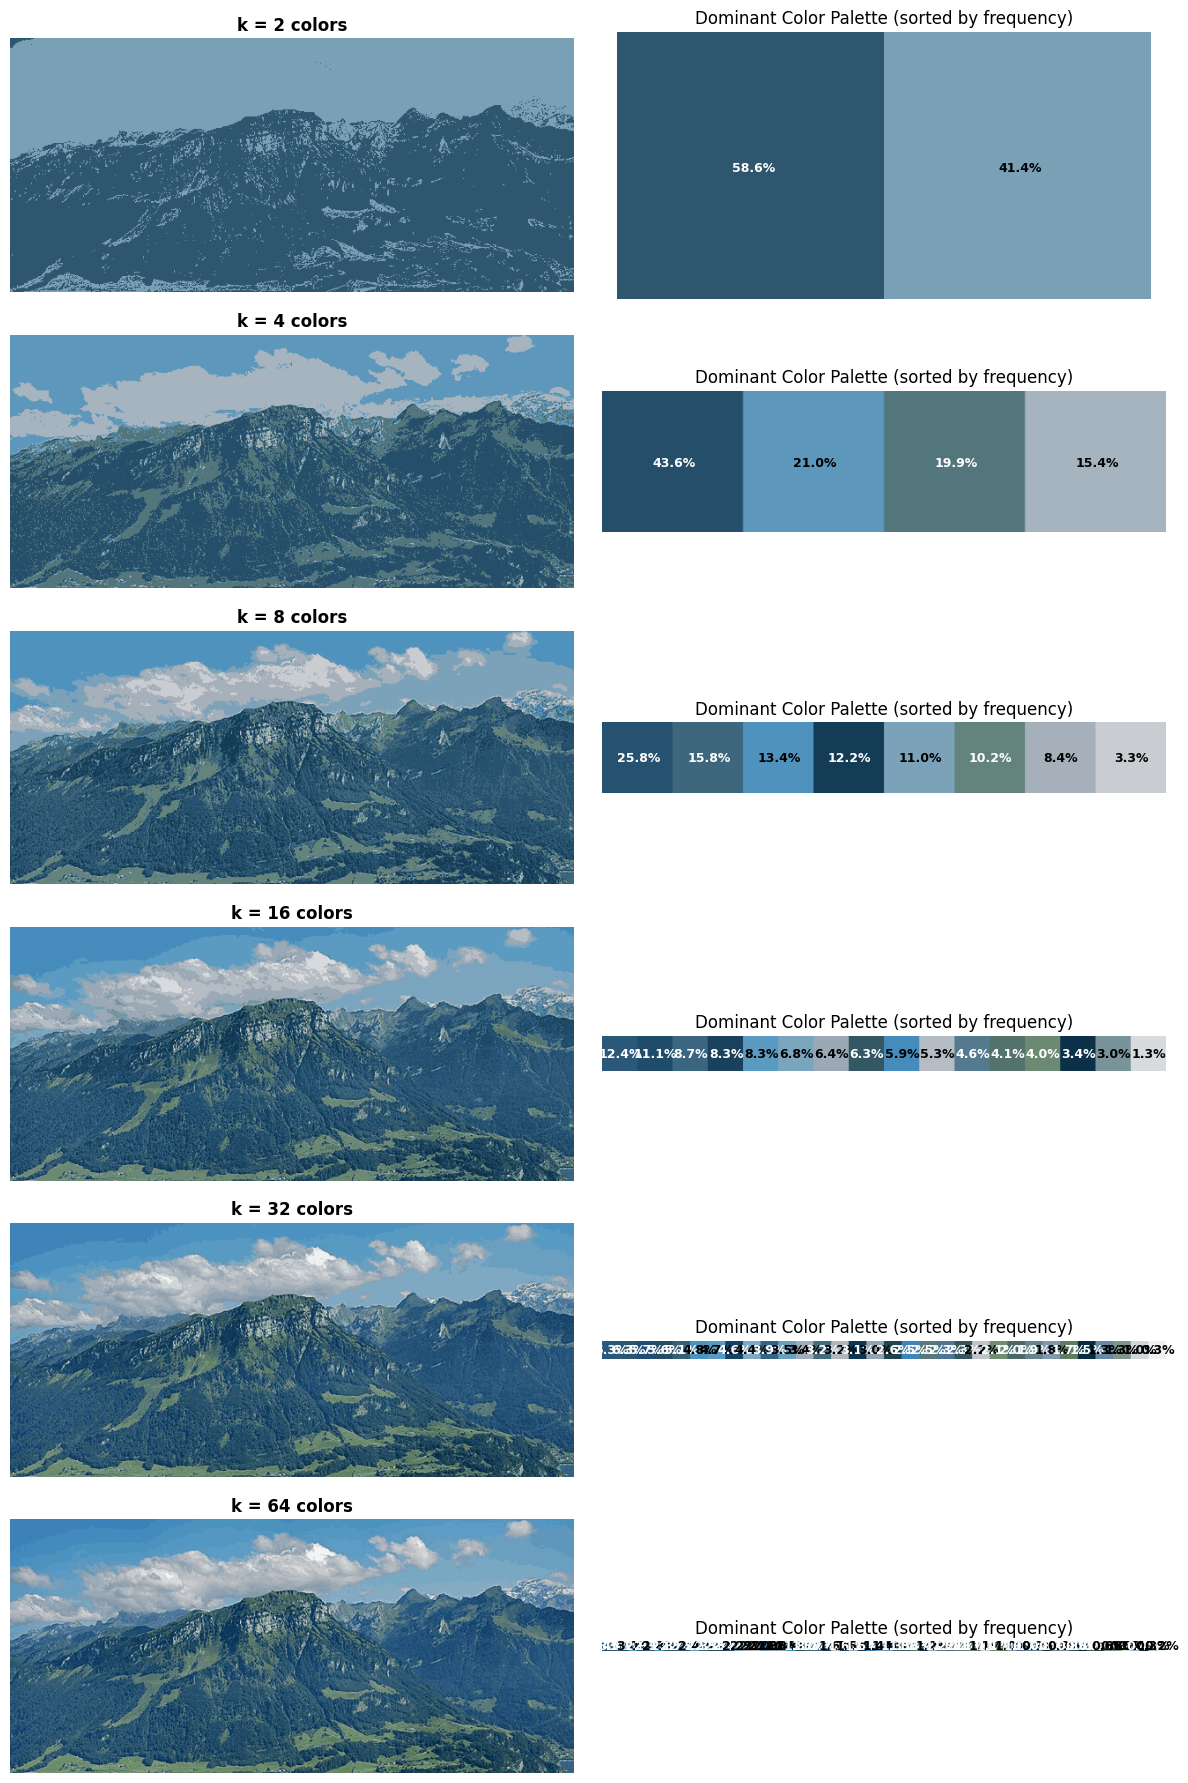

In [80]:
# Visualize the dominant colors for different k values
fig, axes = plt.subplots(len(k_values), 2, figsize=(12, 3*len(k_values)))

for idx, k in enumerate(k_values):
    # Get cluster centers (dominant colors)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)
    
    # Count pixels in each cluster
    labels = kmeans.labels_
    unique, counts = np.unique(labels, return_counts=True)
    
    # Sort by frequency
    sorted_indices = np.argsort(-counts)
    colors = colors[sorted_indices]
    counts = counts[sorted_indices]
    
    # Show compressed image
    axes[idx, 0].imshow(compressed_images[k])
    axes[idx, 0].set_title(f'k = {k} colors', fontsize=12, fontweight='bold')
    axes[idx, 0].axis('off')
    
    # Show color palette
    palette = np.zeros((50, k*50, 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        palette[:, i*50:(i+1)*50] = color
    
    axes[idx, 1].imshow(palette)
    axes[idx, 1].set_title(f'Dominant Color Palette (sorted by frequency)', fontsize=12)
    axes[idx, 1].axis('off')
    
    # Add frequency labels
    for i, count in enumerate(counts):
        pct = 100 * count / len(pixels)
        axes[idx, 1].text(i*50 + 25, 25, f'{pct:.1f}%', 
                         ha='center', va='center', fontsize=9,
                         color='white' if np.mean(colors[i]) < 128 else 'black',
                         fontweight='bold')

plt.tight_layout()
plt.show()

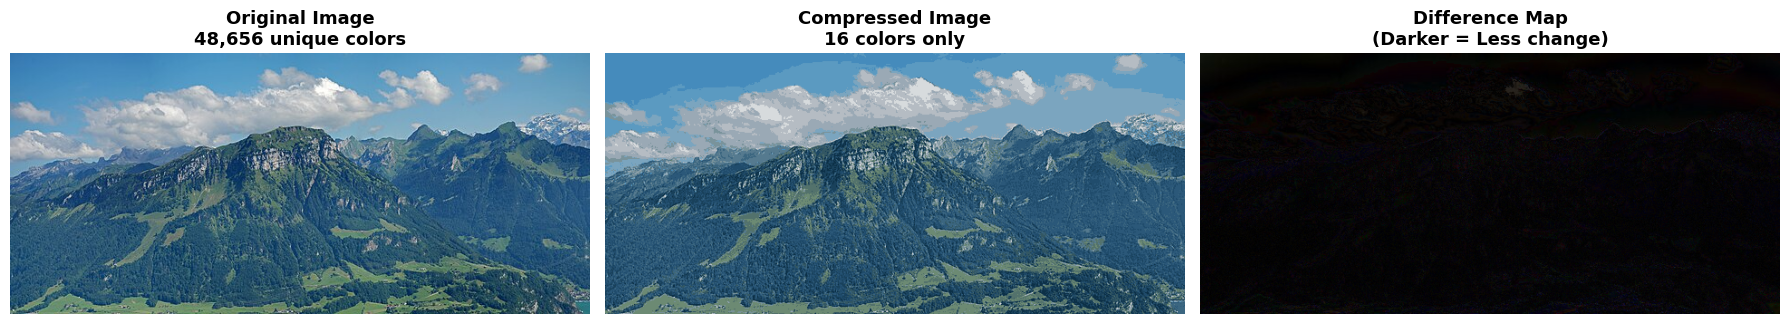


📦 COMPRESSION STATISTICS (k=16):
   Original colors: 48,656
   Compressed colors: 16
   Reduction: 83.32%
   Approximate compression ratio: 6.00x
   Mean pixel difference: 6.01 (out of 255)


In [81]:
optimal_k = 16

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original
axes[0].imshow(img_array)
axes[0].set_title(f'Original Image\n{len(np.unique(pixels, axis=0)):,} unique colors', 
                 fontsize=13, fontweight='bold')
axes[0].axis('off')

# Compressed
axes[1].imshow(compressed_images[optimal_k])
axes[1].set_title(f'Compressed Image\n{optimal_k} colors only', 
                 fontsize=13, fontweight='bold')
axes[1].axis('off')

# Difference
difference = np.abs(img_array.astype(int) - compressed_images[optimal_k].astype(int))
axes[2].imshow(difference)
axes[2].set_title('Difference Map\n(Darker = Less change)', 
                 fontsize=13, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calculate compression metrics
original_size = img_array.nbytes
compressed_size = optimal_k * 3 + len(pixels) * np.ceil(np.log2(optimal_k)) / 8
compression_ratio = original_size / compressed_size

print(f"\n📦 COMPRESSION STATISTICS (k={optimal_k}):")
print(f"   Original colors: {len(np.unique(pixels, axis=0)):,}")
print(f"   Compressed colors: {optimal_k}")
print(f"   Reduction: {100*(1-compressed_size/original_size):.2f}%")
print(f"   Approximate compression ratio: {compression_ratio:.2f}x")
print(f"   Mean pixel difference: {np.mean(difference):.2f} (out of 255)")